In [1]:
import sys ; sys.path.insert(0, '../')
from notebook_tools import *
%matplotlib inline

# pp-SRC c.m. analysis

In [2]:
columns = ['Pmiss3Mag','pcmX','pcmY','pcmZ']
data = dict()
for target in ['C12','Al27','Fe56','Pb208']:
    data[target] = read_root( path+"/OrAnalysisTrees/AdjustedTrees/SRC_e2p_adjusted_300Pmiss600_%s.root"%target, columns=columns )

In [16]:
cm_pars = pd.read_csv('/Users/erezcohen/Desktop/DataMining/Analysis_DATA/ppSRCcm/300Pmiss600/alltargets_dataCMparameters.csv')
cm_pars['sigma_t'] = 0.5*(cm_pars['sigma_x_unweighted']+cm_pars['sigma_y_unweighted'])
cm_pars['sigma_tErr_Or'] = 1./np.sqrt( 1./np.square(cm_pars['sigma_xErr_unweighted']) + 1./np.square(cm_pars['sigma_yErr_unweighted']) )
cm_pars['sigma_tErr'] = 0.5*np.sqrt( np.square(cm_pars['sigma_xErr_unweighted']) + np.square(cm_pars['sigma_yErr_unweighted']) )

cm_pars['sigma_t_weighted'] = 0.5*(cm_pars['sigma_x_weighted']+cm_pars['sigma_y_weighted'])
cm_pars['sigma_tErr_weighted'] = 1./np.sqrt( 1./np.square(cm_pars['sigma_xErr_weighted']) + 1./np.square(cm_pars['sigma_yErr_weighted']) )

cm_pars_with_correction = cm_pars

In [10]:
cm_pars

,Nevts,mean_xErr_unweighted,mean_xErr_weighted,mean_x_unweighted,mean_x_weighted,mean_yErr_unweighted,mean_yErr_weighted,mean_y_unweighted,mean_y_weighted,mean_zErr_unweighted,...,sigma_zErr_unweighted,sigma_zErr_weighted,sigma_z_unweighted,sigma_z_weighted,target,A,sigma_t,sigma_tErr,sigma_t_weighted,sigma_tErr_weighted
0,294,0.009011,0.067244,-0.026041,0.005992,0.009308,0.054345,-0.006231,0.002420,0.008553,...,0.006048,0.039130,0.146657,0.154943,$^{12}$C,12,0.157056,0.004580,0.169206,0.029750
1,93,0.019052,0.053348,-0.033282,-0.007863,0.017804,0.074141,0.014392,0.112731,0.014821,...,0.010477,0.068975,0.142934,0.199756,$^{27}$Al,27,0.177730,0.009215,0.129088,0.030399
2,247,0.011169,0.103551,-0.023499,-0.004205,0.011791,0.094115,-0.006298,-0.087146,0.009746,...,0.006890,0.056832,0.153174,0.174101,$^{56}$Fe,56,0.180429,0.005741,0.212375,0.048729
3,49,0.027176,0.141531,-0.020898,-0.033864,0.022977,0.112790,0.016871,0.072620,0.023920,...,0.016885,0.076441,0.167473,0.135942,$^{208}$Pb,208,0.175565,0.012571,0.157333,0.060981


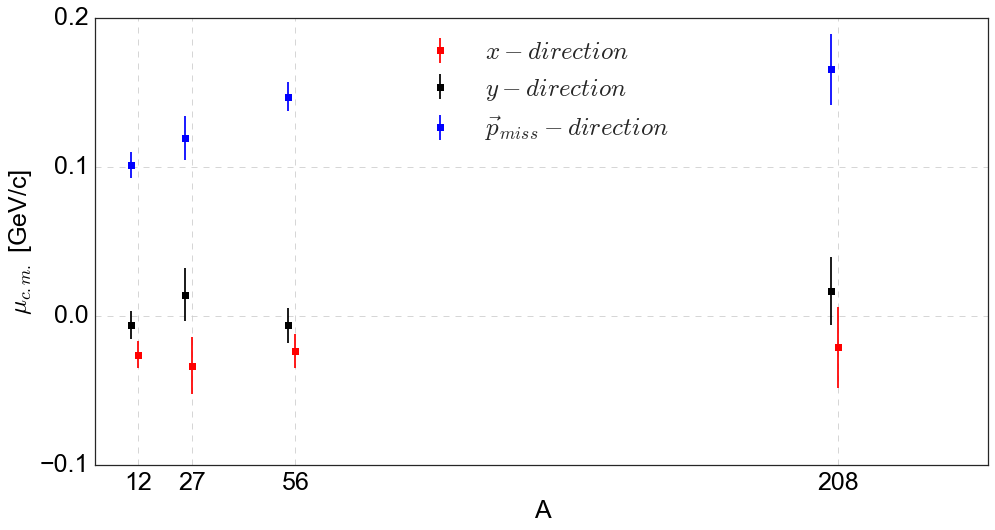

In [11]:
fig = plt.figure(figsize=(16,8))
ax = fig.add_subplot(1,1,1)
ax.errorbar(x=cm_pars['A'],y=cm_pars['mean_x_unweighted'],yerr=cm_pars['mean_xErr_unweighted'],fmt='s',color='red',label='$x-direction$')
ax.errorbar(x=cm_pars['A']-2,y=cm_pars['mean_y_unweighted'],yerr=cm_pars['mean_yErr_unweighted'],fmt='s',color='black',label='$y-direction$')
ax.errorbar(x=cm_pars['A']-2,y=cm_pars['mean_z_unweighted'],yerr=cm_pars['mean_zErr_unweighted'],fmt='s',color='blue',label='$\\vec{p}_{miss}-direction$')
set_axes(ax,'A','$\\mu_{c.m.}$ [GeV/c]')
ax.xaxis.set_ticks([12,27,56,208])
ax.grid(linestyle='--',alpha=0.8)
ax.legend(fontsize=25,loc='upper center')

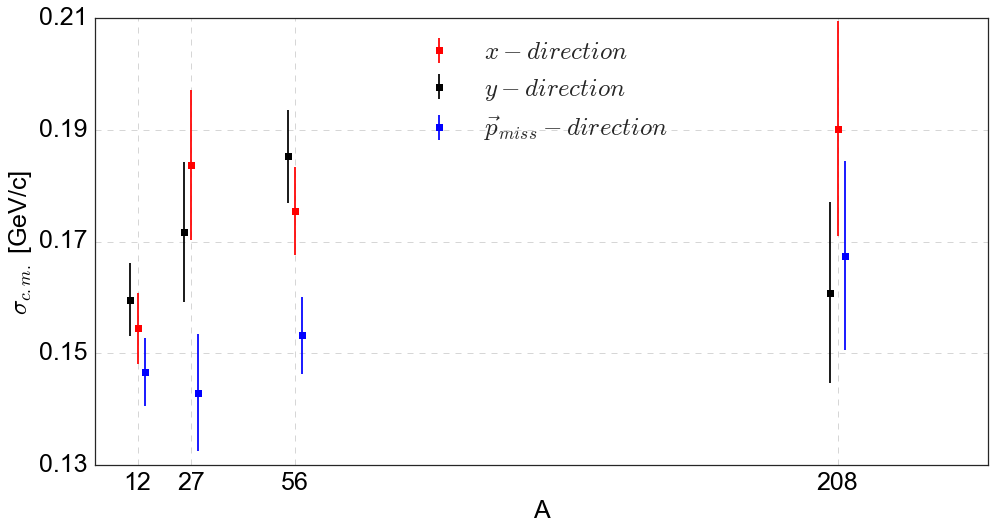

In [12]:
fig = plt.figure(figsize=(16,8))
ax = fig.add_subplot(1,1,1)
ax.errorbar(x=cm_pars['A'],y=cm_pars['sigma_x_unweighted'],yerr=cm_pars['sigma_xErr_unweighted'],fmt='s',color='red',label='$x-direction$')
ax.errorbar(x=cm_pars['A']-2,y=cm_pars['sigma_y_unweighted'],yerr=cm_pars['sigma_yErr_unweighted'],fmt='s',color='black',label='$y-direction$')
ax.errorbar(x=cm_pars['A']+2,y=cm_pars['sigma_z_unweighted'],yerr=cm_pars['sigma_zErr_unweighted'],fmt='s',color='blue',label='$\\vec{p}_{miss}-direction$')
set_axes(ax,'A','$\\sigma_{c.m.}$ [GeV/c]')
ax.xaxis.set_ticks([12,27,56,208]);ax.yaxis.set_ticks([0.13,0.15,0.17,0.19,0.21]);
ax.grid(linestyle='--',alpha=0.8)
ax.legend(fontsize=25,loc='upper center')

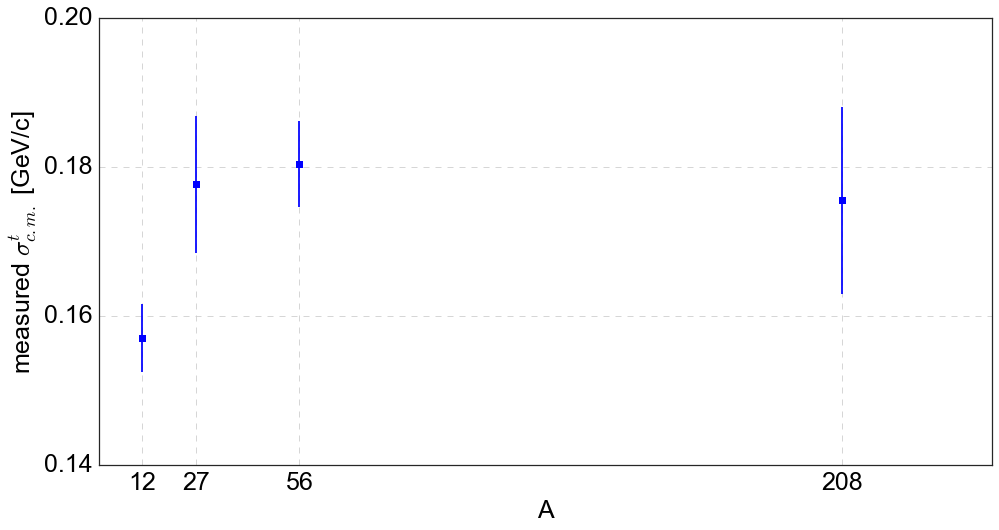

In [19]:
fig = plt.figure(figsize=(16,8))
ax = fig.add_subplot(1,1,1)
ax.errorbar(x=cm_pars['A'],y=cm_pars['sigma_t'],yerr=cm_pars['sigma_tErr'],fmt='s',color='blue',ecolor='blue',label='transverse direction')
# ax.errorbar(x=cm_pars['A']-1,y=cm_pars['sigma_t'],yerr=cm_pars['sigma_tErr_Or'],fmt='s',color='red',ecolor='black',label='transverse direction')
# ax.errorbar(x=cm_pars['A'],y=cm_pars['sigma_t_weighted'],yerr=cm_pars['sigma_tErr_weighted'],fmt='o',color='blue',ecolor='black',label='weighted')
set_axes(ax,'A','measured $\\sigma_{c.m.}^{t}$ [GeV/c]')
ax.xaxis.set_ticks([12,27,56,208]);ax.yaxis.set_ticks([0.14,0.16,0.18,0.2]);
ax.grid(linestyle='--',alpha=0.8)

In [20]:
simulations_results = pd.read_csv("/Users/erezcohen/Desktop/DataMining/Analysis_DATA/ppSRCcm/simulation_300Pmiss600/results_300Pmiss600_simulation_0_1000_simulationruns_results.csv")
len(simulations_results)

IOError: File /Users/erezcohen/Desktop/DataMining/Analysis_DATA/ppSRCcm/simulation_300Pmiss600/results_300Pmiss600_simulation_0_1000_simulationruns_results.csv does not exist

In [21]:
def find_x_poly(poly,y0,xmin=0,xmax=0.3):
    p = np.poly1d(poly)
    roots = (p - y0).roots
    for root in roots:
        if xmin<root and root<xmax:
            x_poly = root
    return x_poly

In [22]:
def plot_cm_direction(ax=None,A=12,direction='x',colors=['blue','royalblue']):

    gen,rec = simulations_results['gen_Sigma'],simulations_results['rec_sigma_'+direction]
    plt.scatter(gen,rec,color=colors[1],label='generated vs. reconstructed')
    
    # fit a polynomial of order 2
    popt,cov = np.polyfit( gen, rec , 3 , cov=True)
    # print popt , np.sqrt(cov[0][0]) , np.sqrt(cov[1][1]) , np.sqrt(cov[2][2])


    x = np.linspace(np.min(ax.get_xlim()),np.max(ax.get_xlim()),1000)
    poly = np.poly1d(popt)
    ax.plot(x,poly(x),'-',color='black',linewidth=2,label='best fit')

    cm_pars_target = cm_pars[cm_pars['A']==A]
    index = cm_pars[cm_pars['A']==A].index
#     print 'index:',index
    
    # reconstructed \sigma in data
    sigma_meas, sigma_meas_err = float(cm_pars_target['sigma_'+direction+'_unweighted']), float(cm_pars_target['sigma_'+direction+'Err_unweighted'])
    y =  np.ones(len(x)) * sigma_meas
    yErr =  np.ones(len(x)) * sigma_meas_err
    x_poly = find_x_poly(poly,sigma_meas)
    x_poly_up = find_x_poly(poly,sigma_meas+sigma_meas_err)
    x_poly_down = find_x_poly(poly,sigma_meas-sigma_meas_err)
    x_poly_err = np.average([x_poly_up-x_poly,x_poly-x_poly_down])
    
    plt.plot( np.linspace(np.min(ax.get_xlim()),x_poly,1000) , y , color=colors[1],label='measured: $%.3f\\pm%.3f$'%(sigma_meas, sigma_meas_err))
    plt.plot( np.linspace(np.min(ax.get_xlim()),x_poly_up,1000) , y+yErr , color=colors[1],linestyle='--')
    plt.plot( np.linspace(np.min(ax.get_xlim()),x_poly_down,1000) , y-yErr , color=colors[1],linestyle='--')
    
    # project to generated
    plt.plot( [x_poly,x_poly] , [np.min(ax.get_ylim()),sigma_meas] , color=colors[0],label='corrected: $%.3f \\pm %.3f$'%(x_poly, x_poly_err))
    plt.plot( [x_poly_up,x_poly_up] , [np.min(ax.get_ylim()),sigma_meas+sigma_meas_err] , color=colors[0] ,linestyle='--')
    plt.plot( [x_poly_down,x_poly_down] , [np.min(ax.get_ylim()),sigma_meas-sigma_meas_err] , color=colors[0] ,linestyle='--' )
    
    cm_pars_with_correction.set_value(index,'sigma_'+direction+'_corrected',x_poly)
    cm_pars_with_correction.set_value(index,'sigma_'+direction+'Err_corrected',x_poly_err)
    
    set_axes(ax,'gen. $\\sigma$ [GeV/c]','rec. $\\sigma_'+direction+'$ [GeV/c]'    
             , xticks=[0,0.05,0.1,0.15,0.2,0.25,0.3] , yticks=[0,0.05,0.1,0.15,0.2,0.25,0.3] , do_add_grid=True 
             ,title = cm_pars_target['target'].to_string(index=False) + ', $'+direction+'-direction$')


    ax.legend(loc='upper left',fontsize=20,scatterpoints=3)
    ax.set_xlim(0,0.3);ax.set_ylim(0,0.3);

NameError: global name 'simulations_results' is not defined

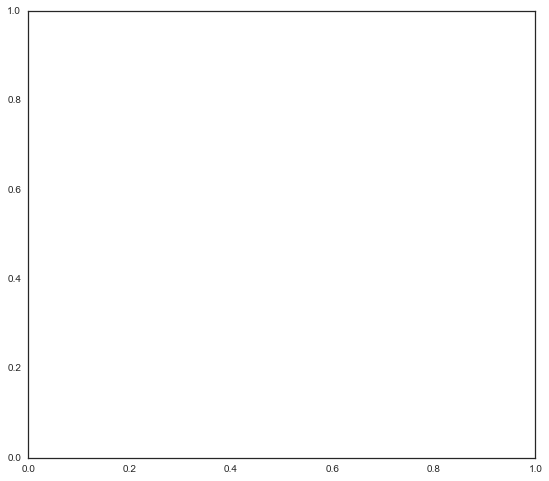

In [23]:
for A in [12,27,56,208]:
    
    fig=plt.figure(figsize=(20,8))

    ax=fig.add_subplot(1,2,1)
    plot_cm_direction(ax=ax,A=A,direction='x',colors=['blue','royalblue']);

    ax=fig.add_subplot(1,2,2)
    plot_cm_direction(ax=ax,A=A,direction='y',colors=['red','salmon']);

    plt.tight_layout()


In [45]:
simulation145 = dict()
for filename in ['NoAcceptance_NoPrecMomentum_NoPrecFiducial'
                 ,'Acceptance_NoPrecMomentum_NoPrecFiducial'
                 ,'NoAcceptance_PrecMomentum_NoPrecFiducial'
                 ,'NoAcceptance_PrecMomentum_PrecFiducial'
                 ,'Acceptance_PrecMomentum_PrecFiducial']:
    simulation145[filename] = read_root( "/Users/erezcohen/Desktop/DataMining/Analysis_DATA/ppSRCcm/eg_rootfiles/sigma145MeVc_%s.root"%filename, columns=columns )
simulation190 = dict()
for filename in ['NoAcceptance_NoPrecMomentum_NoPrecFiducial'
                 ,'Acceptance_NoPrecMomentum_NoPrecFiducial'
                 ,'Acceptance_PrecMomentum_PrecFiducial']:
    simulation190[filename] = read_root( "/Users/erezcohen/Desktop/DataMining/Analysis_DATA/ppSRCcm/eg_rootfiles/sigma190MeVc_%s.root"%filename, columns=columns )    

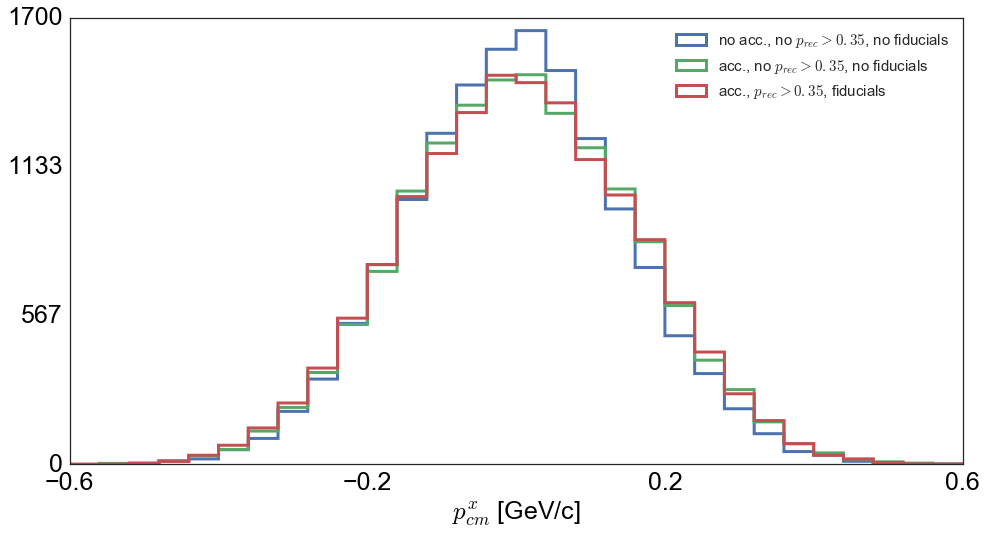

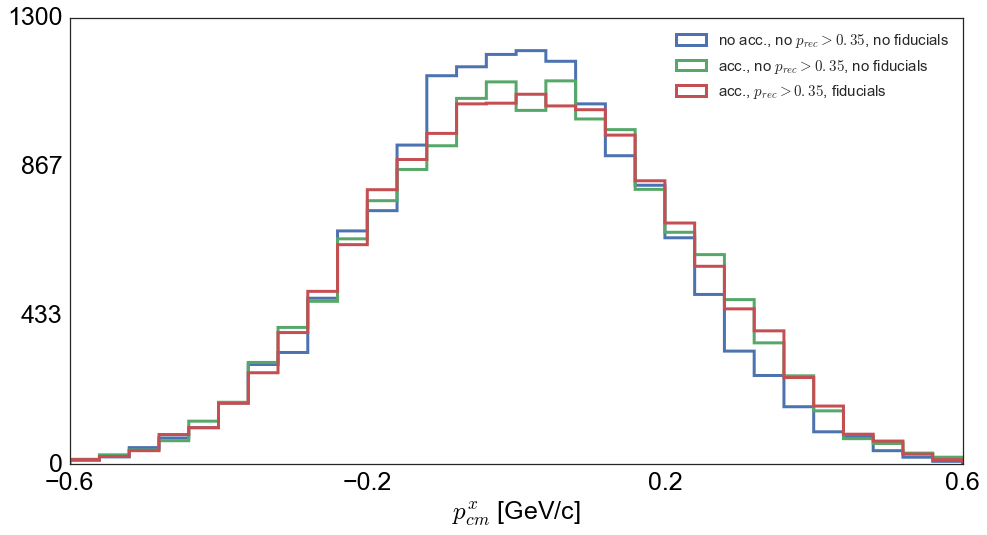

In [46]:
fig,ax=plt.subplots(figsize=(16,8))
for filename,label in zip(['NoAcceptance_NoPrecMomentum_NoPrecFiducial'
                           ,'Acceptance_NoPrecMomentum_NoPrecFiducial'
                           ,'Acceptance_PrecMomentum_PrecFiducial']
                          ,['no acc., no $p_{rec}>0.35$, no fiducials'
                            ,'acc., no $p_{rec}>0.35$, no fiducials'
                            ,'acc., $p_{rec}>0.35$, fiducials']):
    plt.hist(simulation145[filename]['pcmX']
             ,bins=np.linspace(-0.6,0.6,31),histtype='step',linewidth=3
             ,label=label
            )
    ax.legend(fontsize=15)
    set_axes(ax,'$p_{cm}^{x}$ [GeV/c]')
    
fig,ax=plt.subplots(figsize=(16,8))
for filename,label in zip(['NoAcceptance_NoPrecMomentum_NoPrecFiducial'
                           ,'Acceptance_NoPrecMomentum_NoPrecFiducial'
                           ,'Acceptance_PrecMomentum_PrecFiducial']
                          ,['no acc., no $p_{rec}>0.35$, no fiducials'
                            ,'acc., no $p_{rec}>0.35$, no fiducials'
                            ,'acc., $p_{rec}>0.35$, fiducials']):
    plt.hist(simulation190[filename]['pcmX']
             ,bins=np.linspace(-0.6,0.6,31),histtype='step',linewidth=3
             ,label=label
            )
    ax.legend(fontsize=15)
    set_axes(ax,'$p_{cm}^{x}$ [GeV/c]')    

In [52]:
cm_pars_with_correction['sigma_t_corrected'] = 0.5*(cm_pars_with_correction['sigma_x_corrected']+cm_pars_with_correction['sigma_y_corrected'])
cm_pars_with_correction['sigma_tErr_corrected'] = 1./np.sqrt( 1./np.square(cm_pars_with_correction['sigma_xErr_corrected']) + 1./np.square(cm_pars_with_correction['sigma_yErr_corrected']) )
# cm_pars_with_correction['sigma_t_final'] = np.sqrt( np.square(cm_pars_with_correction['sigma_t_corrected']) - np.square(0.020))
# cm_pars_with_correction['sigma_tErr_final'] = np.sqrt( np.square(cm_pars_with_correction['sigma_tErr_corrected']) + np.square(0.005))
cm_pars_with_correction[['target','sigma_t','sigma_t_corrected','sigma_t_final']]

KeyError: 'sigma_x_corrected'

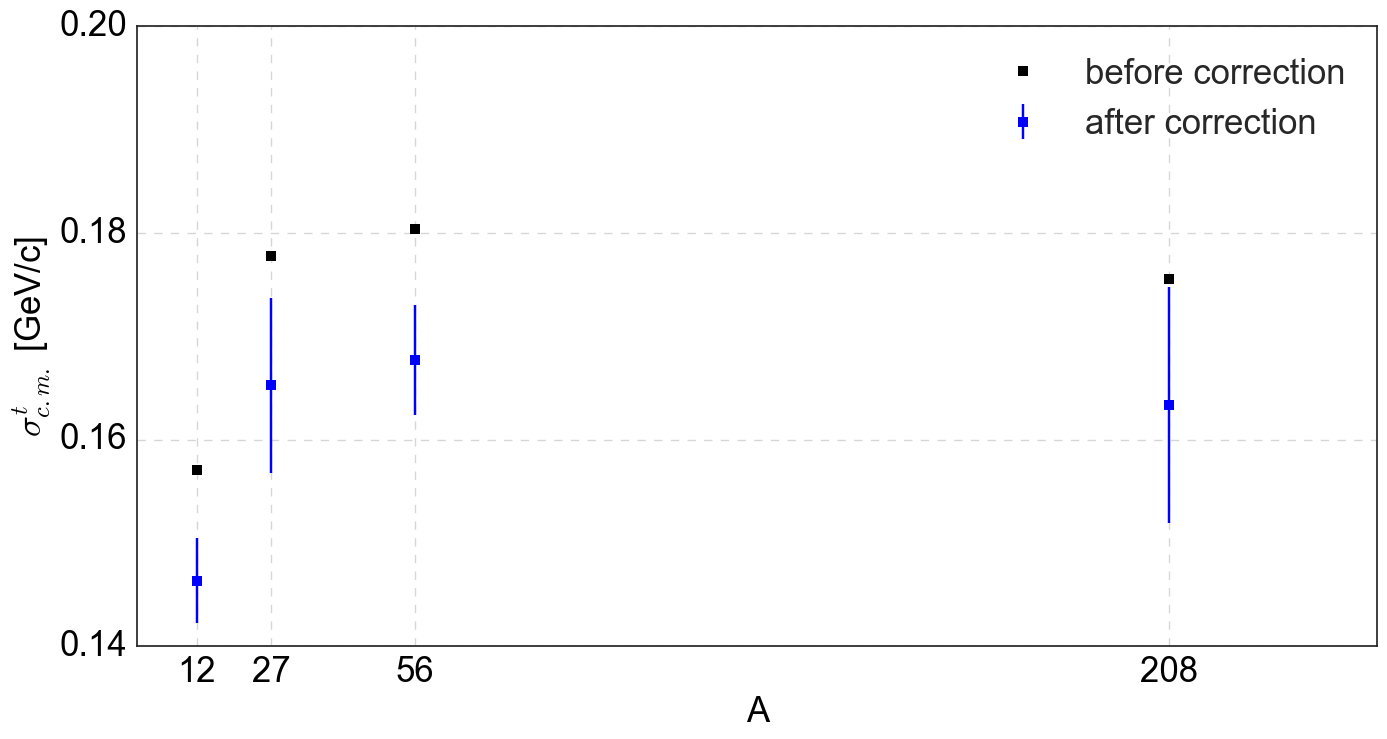

In [152]:
fig = plt.figure(figsize=(16,8))
ax = fig.add_subplot(1,1,1)
plt.plot(cm_pars_with_correction['A'],cm_pars_with_correction['sigma_t'],'s',color='black',label='before correction')
ax.errorbar(x=cm_pars_with_correction['A'],y=cm_pars_with_correction['sigma_t_corrected'],yerr=cm_pars_with_correction['sigma_tErr_corrected'],fmt='s',color='blue',ecolor='blue',label='after correction')

set_axes(ax,'A','$\\sigma_{c.m.}^{t}$ [GeV/c]')
ax.xaxis.set_ticks([12,27,56,208]);ax.yaxis.set_ticks([0.14,0.16,0.18,0.2]);
ax.grid(linestyle='--',alpha=0.8)
ax.legend(fontsize=25,loc='best')

# add calculations...

In [49]:
ColleCalc = pd.DataFrame({'A':[4,12 , 27 , 56 , 208],
                        'allpairs':[0.110,0.140,0.144,0.146,0.145],
                        'nl00':[0.110,0.156,0.164,0.172,0.178]},
                         index = ['$^{4}$He','$^{12}$C','$^{27}$Al','$^{56}$Fe','$^{208}$Pb'])
CiofiCalc = pd.DataFrame({'A':[4 , 12 , 16 , 40 , 56 , 208], # 3 , 
                        's_t':[0.0899 , 0.1393 , 0.1272 , 0.1407 , 0.1328 , 0.1511]}, # 0.0724
                         index = ['$^{4}$He','$^{12}$C','$^{16}$O','$^{40}$Ca','$^{56}$Fe','$^{208}$Pb']) # '$^{3}$He',
MonizCalc = pd.DataFrame({'A':[12 , 40 , 208],
                        '3kF/4':[0.1658 , 0.1883 , 0.1988]},
                         index = ['$^{12}$C','$^{40}$Ca','$^{208}$Pb'])

BNL_Data = pd.DataFrame({'A':[12],'sigma_t_final':[0.143],'s_t_final_Err':[0.017]},index = ['$^{12}$C'])
HallA_Data = pd.DataFrame({'A':[12],'sigma_t_final':[0.136],'s_t_final_Err':[0.020]},index = ['$^{12}$C'])
Korover_Data = pd.DataFrame({'A':[4],'sigma_t_final':[0.100],'s_t_final_Err':[0.020]},index = ['$^{4}$He'])

WI_Data = pd.DataFrame({'A':[ 12 , 27 , 56 , 208], 
                        'sigma_t_final':[0.158 , 0.156 , 0.181 , 0.174], 
                        'sigma_t_final_Err':[0.012 , 0.019 , 0.011 , 0.016]}, 
                         index = ['$^{12}$C','$^{27}$Al','$^{56}$Fe','$^{208}$Pb']) 

In [50]:
def plot_data(data , Ashift=0, fmt='o', marker='^',color='red',
                       markersize=15, linewidth=4, 
                       vary=None , varyerr=None , label=None ):
    ax.errorbar((data['A']+Ashift), data['sigma_t_final'], yerr=data['s_t_final_Err'],                
                color=color, marker=marker,markersize=markersize,linewidth=linewidth, fmt=fmt,label=label)
    
def plot_calculation_line( data , varx='A',kind='nearest' , vary=None , color='blue' ,linestyle='--', label=None, linewidth=4):
    x = data[varx]
    y = data[vary]
    itp = interp1d(x,y, kind='linear')

    if kind is None:
        f = interp1d( x , y )
    else:
        f = interp1d( x , y ,kind=kind)

    window_size, poly_order = 101, 4
    xnew = np.linspace(x.min(),x.max(), num=500, endpoint=True)
    yy_sg = savgol_filter(itp(xnew), window_size, poly_order)
    plt.plot( xnew, yy_sg, linestyle, color=color , label=label, linewidth=linewidth )

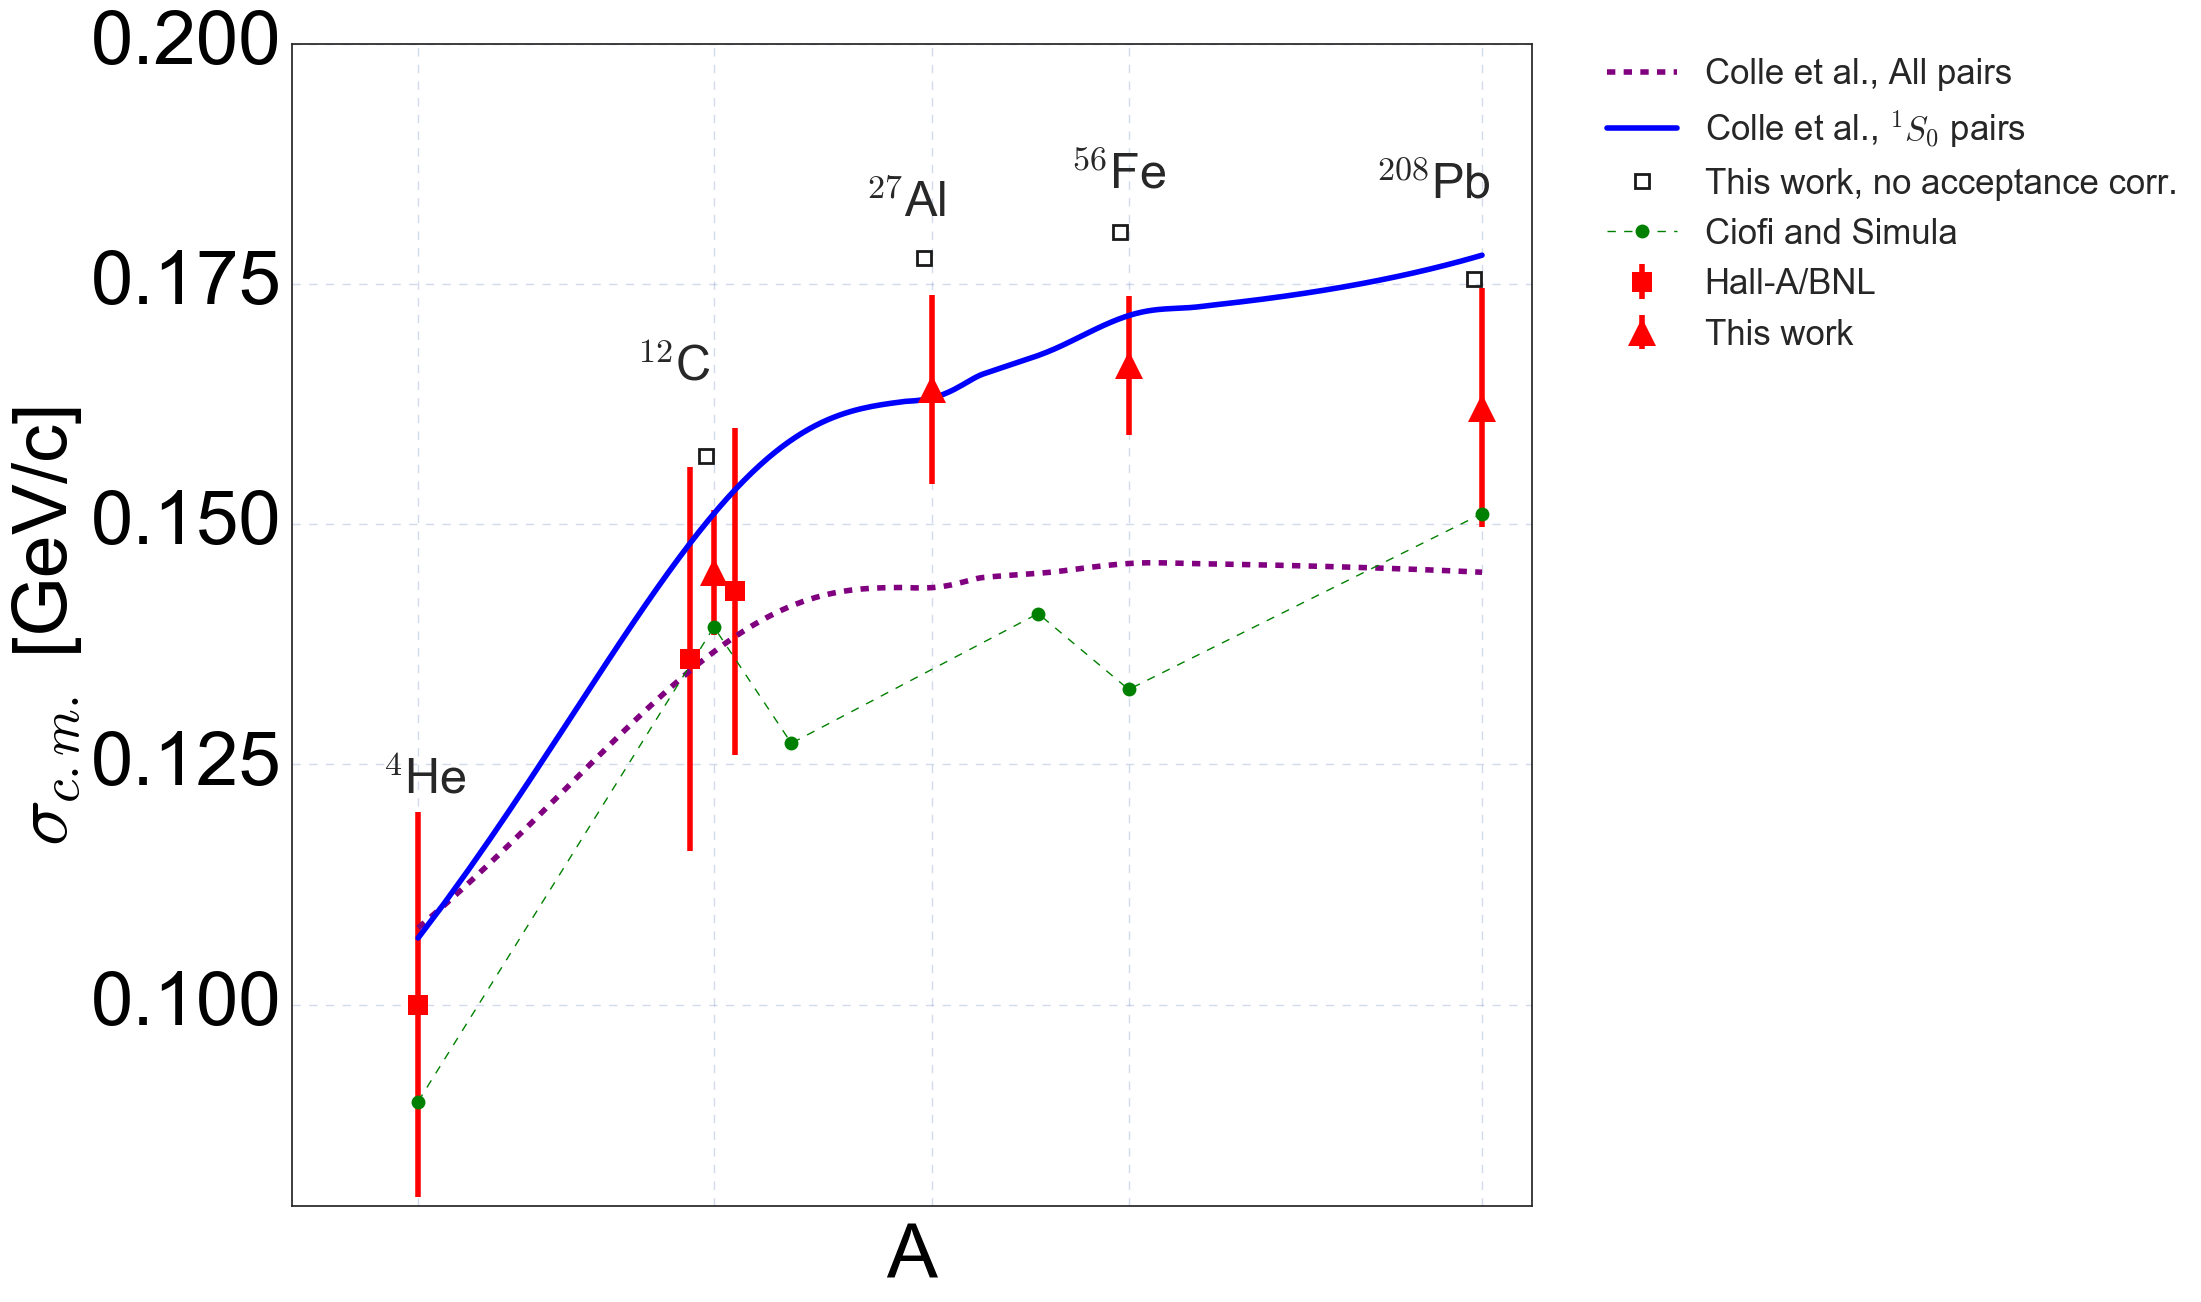

In [182]:
s=30
fig, ax = plt.subplots(figsize=(16,15))
plot_calculation_line( kind='slinear',data=ColleCalc, varx='A' , vary='allpairs',color='purple' ,label='Colle et al., All pairs')
plot_calculation_line( kind='slinear',data=ColleCalc, varx='A' ,linestyle='-', vary='nl00',label='Colle et al., $^1S_0$ pairs')
ax.errorbar(CiofiCalc.A, CiofiCalc.s_t,color='green',fmt='--o',ms=10,linewidth=1,label='Ciofi and Simula')

plot_data( data=BNL_Data, Ashift=1 , marker='s', label=None )
plot_data( data=HallA_Data, Ashift=-1 , marker='s' , label='Hall-A/BNL' )
plot_data( data=Korover_Data , marker='s' , label=None )

ax.plot(0.97*cm_pars['A'], cm_pars['sigma_t'] ,color='red', marker='s',mfc='none',lw = 2, mew = 2, ms = 10, linewidth=0, label='This work, no acceptance corr.')
plot_data( data=cm_pars_with_correction, label='This work', markersize=20 )

ax.set_xscale('log')


set_axes(ax , 'A' , '$\sigma_{c.m.}$ [GeV/c]' , fontsize=55 , xticks=[4,12,27,56,208],yticks=[0.1,0.125,0.15,0.175,0.2])
ax.legend(fontsize=25,bbox_to_anchor=(1.05, 1), borderaxespad=0.,loc=2)
ax.grid(b=True, which='major', color='b', linestyle='--',alpha=0.25)

ax.set_xlim(2.5,250);
ax.set_ylim(0.079,0.200);
ax.text(3.5,0.122,'$^4$He',fontsize=35)
ax.text(9,0.165,'$^{12}$C',fontsize=35)
ax.text(21,0.182,'$^{27}$Al',fontsize=35)
ax.text(45,0.185,'$^{56}$Fe',fontsize=35)
ax.text(140,0.184,'$^{208}$Pb',fontsize=35)

/usr/local/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


KeyError: 's_t_final_Err'

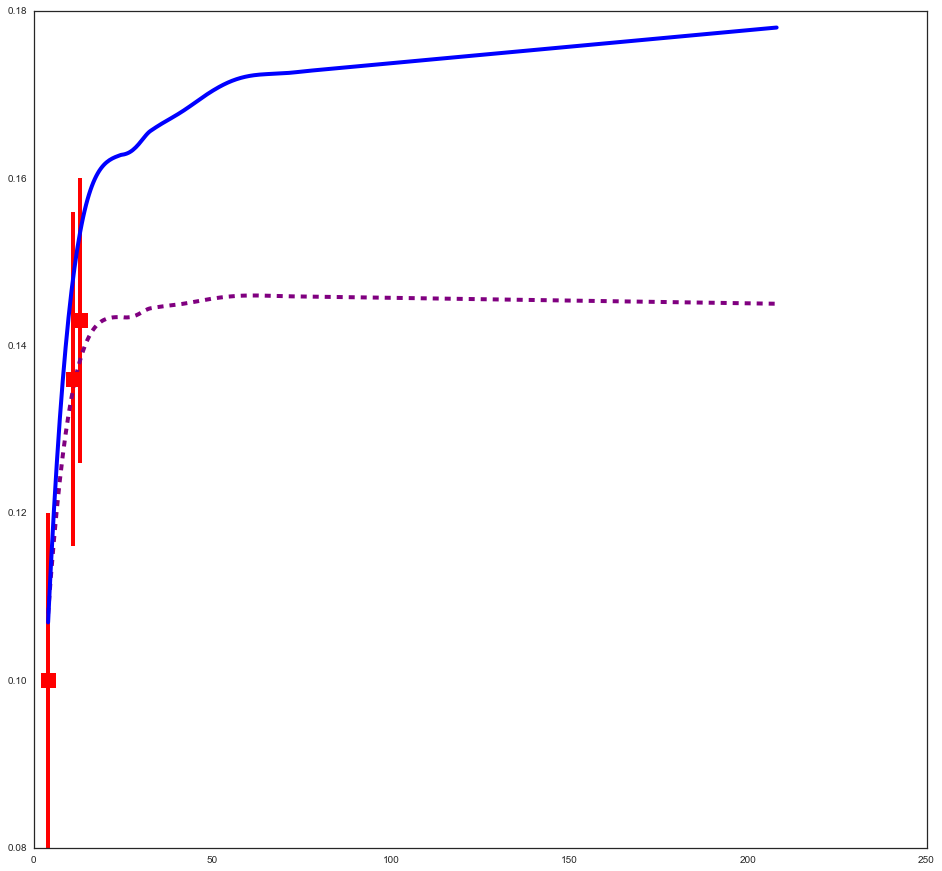

In [51]:
fig, ax = plt.subplots(figsize=(16,15))
plot_calculation_line( kind='slinear',data=ColleCalc, varx='A' , vary='allpairs',color='purple' ,label='Colle et al., All pairs')
plot_calculation_line( kind='slinear',data=ColleCalc, varx='A' ,linestyle='-', vary='nl00',label='Colle et al., $^1S_0$ pairs')

plot_data( data=BNL_Data, Ashift=1 , marker='s', label=None )
plot_data( data=HallA_Data, Ashift=-1 , marker='s' , label='Hall-A/BNL' )
plot_data( data=Korover_Data , marker='s' , label=None )

plot_data( data=WI_Data, label='results in WI', markersize=20 )
plot_data( data=cm_pars_with_correction, label='results $0.3<p_{miss}<0.6$ GeV/c', markersize=20 )

ax.set_xscale('log')

set_axes(ax , 'A' , '$\sigma_{c.m.}$ [GeV/c]' , fontsize=55 , xticks=[4,12,27,56,208],yticks=[0.1,0.125,0.15,0.175,0.2])
ax.legend(fontsize=25,bbox_to_anchor=(1.05, 1), borderaxespad=0.,loc=2)
ax.grid(b=True, which='major', color='b', linestyle='--',alpha=0.25)

ax.set_xlim(2.5,250);
ax.set_ylim(0.079,0.200);
ax.text(3.5,0.122,'$^4$He',fontsize=35)
ax.text(9,0.165,'$^{12}$C',fontsize=35)
ax.text(21,0.182,'$^{27}$Al',fontsize=35)
ax.text(45,0.185,'$^{56}$Fe',fontsize=35)
ax.text(140,0.184,'$^{208}$Pb',fontsize=35)